In [5]:
"""
Viewing a reaction path diagram.

This script uses Graphviz to generate an image. You must have Graphviz installed
and the program 'dot' must be on your path for this example to work.
Graphviz can be obtained from http://www.graphviz.org/ or (possibly) installed
using your operating system's package manager.
"""

import cantera as ct
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [13]:
# these lines can be replaced by any commands that generate
# an object of a class derived from class Kinetics in some state.
gas = ct.Solution('DME_SK39_Zhao.xml')
gas.TPX = 1300.0, ct.one_atm, 'CH3OCH3:1, O2:3, N2:11.28'
r = ct.IdealGasReactor(gas)
net = ct.ReactorNet([r])
T = r.T
while T < 1900:
    net.step()
    T = r.T

element = 'O'

diagram = ct.ReactionPathDiagram(gas, element)
diagram.title = 'Reaction path diagram following {0}'.format(element)
diagram.label_threshold = 0.01

dot_file = 'rxnpath.dot'
img_file = 'rxnpath.png'
img_path = os.path.join(os.getcwd(), img_file)

diagram.write_dot(dot_file)
print(diagram.get_data())

print("Wrote graphviz input file to '{0}'.".format(os.path.join(os.getcwd(), dot_file)))

os.system('dot {0} -Tpng -o{1} -Gdpi=200'.format(dot_file, img_file))
print("Wrote graphviz output file to '{0}'.".format(img_path))

if "-view" in sys.argv:
    import webbrowser
    webbrowser.open('file:///' + img_path)

Reaction path diagram following O
O2 O OH H2O HO2 H2O2 CO2 CO HCO CH2O CH3O CH2OH CH3HCO CH3OCH3 CH3OCH2 CH3OCH2O CH3OCHO CH3OCO CH3OCH2O2 CH3OCH2OH CH2OCH2O2H O2CH2OCH2O2H HO2CH2OCHO OCH2OCHO HOCH2OCO HOCH2O HCOOH 
O2 O 31.2379 -0.284938
O2 OH 37.9777 -0.262577
O2 H2O 0.950119 -7.60526e-18
O2 HO2 30.4428 -12.1684
O2 H2O2 0 -0
O2 CO2 0.0167016 -3.8464e-06
O2 CO 3.16706 -6.79271e-15
O2 HCO 5.17875 -9.9993e-11
O2 CH2O 1.17645 -1.3402e-09
O2 CH3O 0.34334 -0.0223089
O2 CH2OH 0 -0
O2 CH3HCO 0 -0
O2 CH3OCH3 0 -0
O2 CH3OCH2 0 -0
O2 CH3OCH2O 0 -0
O2 CH3OCHO 0 -0
O2 CH3OCO 0 -0
O2 CH3OCH2O2 3.69308e-05 -3.6528e-05
O2 CH3OCH2OH 0 -0
O2 CH2OCH2O2H 0 -0
O2 O2CH2OCH2O2H 5.7377e-12 -5.47881e-12
O2 HO2CH2OCHO 0 -0
O2 OCH2OCHO 0 -0
O2 HOCH2OCO 0 -0
O2 HOCH2O 0 -0
O2 HCOOH 0 -0
O OH 16.8771 -0.480508
O H2O 0 -0
O HO2 0 -0
O H2O2 0 -0
O CO2 0.115755 -1.7937e-07
O CO 0.223373 -0.00835161
O HCO 1.49649 -9.21348e-06
O CH2O 10.9503 -4.01455e-06
O CH3O 0 -0
O CH2OH 0 -0
O CH3HCO 0.125752 -1.31772e-08
O CH3OC

In [15]:
# Simulation parameters
p = ct.one_atm  # pressure [Pa]
Tin = 300.0  # unburned gas temperature [K]
reactants = 'CH3OCH3:1, O2:3, N2:11.28'  # premixed gas composition
width = 0.03  # m
loglevel = 1  # amount of diagnostic output (0 to 8)

# IdealGasMix object used to compute mixture properties, set to the state of the
# upstream fuel-air mixture
gas.TPX = Tin, p, reactants

# Set up flame object
f = ct.FreeFlame(gas, width=width)
f.set_refine_criteria(ratio=3, slope=0.06, curve=0.12)
# Solve with mixture-averaged transport model
f.transport_model = 'Mix'
f.solve(loglevel=loglevel, auto=True)


************ Solving on 8 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.339e-06      6.078
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368      4.967
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.216e-06        6.9
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      8.22e-05      5.158
Attempt Newton solution of steady-state problem...    success.

Problem solved on [9] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state probl

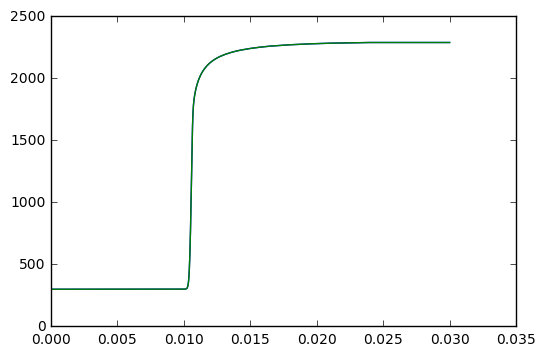

In [24]:
plt.plot(f.grid, f.solution('T'))
plt.show()

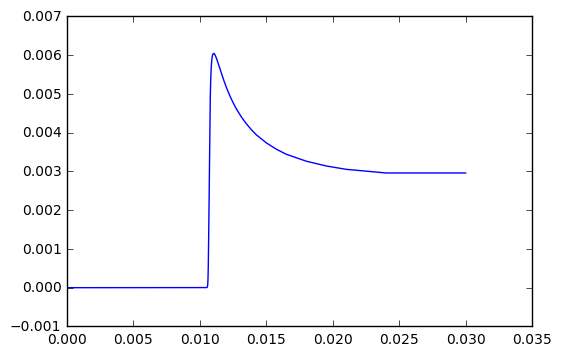

In [25]:
plt.plot(f.grid, f.solution('OH'))
plt.show()